# Classification

## Vertebrate Dataset

We use a variation of the vertebrate data described in Example 3.1 of Chapter 3. Each vertebrate is classified into one of 5 categories: mammals, reptiles, birds, fishes, and amphibians, based on a set of explanatory attributes (predictor variables). Except for "name", the rest of the attributes have been converted into a *one hot encoding* binary representation. To illustrate this, we will first load the data into a Pandas DataFrame object and display its content.

In [ ]:
import pandas as pd

data = pd.read_csv('Data/vertebrate.csv',header='infer')
data

Given the limited number of training examples, suppose we convert the problem into a binary classification task (mammals versus non-mammals). We can do so by replacing the class labels of the instances to *non-mammals* except for those that belong to the *mammals* class.

In [ ]:
data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals', inplace=True )

In [ ]:
data

# Decision Tree Classifier

In this section, we apply a decision tree classifier to the vertebrate dataset described in the previous subsection.

In [ ]:
type(data.drop(['Name','Class'],axis=1))

In [ ]:
from sklearn import tree

Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X, Y)

In [ ]:
X

The preceding commands will extract the predictor (X) and target class (Y) attributes from the vertebrate dataset and create a decision tree classifier object using entropy as its impurity measure for splitting criterion. The decision tree class in Python sklearn library also supports using 'gini' as impurity measure. The classifier above is also constrained to generate trees with a maximum depth equals to 3. Next, the classifier is trained on the labeled data using the fit() function. 

We can plot the resulting decision tree obtained after training the classifier. To do this, you must first install both graphviz (http://www.graphviz.org) and its Python interface called pydotplus (http://pydotplus.readthedocs.io/).

In [ ]:
import pydotplus 
#from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['mammals','non-mammals'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('test.png')
#Image(graph.create_png())

Next, suppose we apply the decision tree to classify the following test examples.

In [ ]:
testData = [['gila monster',0,0,0,0,1,1,'non-mammals'],
           ['platypus',1,0,0,0,1,1,'mammals'],
           ['owl',1,0,0,1,1,0,'non-mammals'],
           ['dolphin',1,1,1,0,0,0,'mammals']]
testData = pd.DataFrame(testData, columns=data.columns)
testData

We first extract the predictor and target class attributes from the test data and then apply the decision tree classifier to predict their classes.

In [ ]:
testY = testData['Class']
testX = testData.drop(['Name','Class'],axis=1)
testX

In [ ]:
predY = clf.predict(testX)
predY

In [ ]:
predictions = pd.concat([testData['Name'],pd.Series(predY,name='Predicted Class')], axis=1)
predictions

Except for platypus, which is an egg-laying mammal, the classifier correctly predicts the class label of the test examples. We can calculate the accuracy of the classifier on the test data as shown by the example given below.

In [ ]:
from sklearn.metrics import accuracy_score
#print(f"{testY.values} is type {type(testY)}")
#print(f"{predY} is type {type(predY)}")

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

## Iris Dataset

In [45]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

print(data.head())
print(data.shape)

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)


In [46]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
classes = data['class'].unique()

str

In [55]:
X = data.drop('class', axis=1).to_numpy()
y = data['class'].to_numpy()

In [56]:
type(X)

numpy.ndarray

In [57]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (150, 4)
y: (150,)


In [82]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [64]:
X_train[87]

array([6.5, 3. , 5.2, 2. ])

In [65]:
print(f'XTrain: {X_train.shape}')
print(f'yTrain: {y_train.shape}')
print(f'XTest: {X_test.shape}')
print(f'yTest: {y_test.shape}')

XTrain: (120, 4)
yTrain: (120,)
XTest: (30, 4)
yTest: (30,)


In [ ]:
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
clf = clf.fit(X_train, y_train)

In [ ]:
X_train.columns

In [ ]:
import pydotplus 
#from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('test33.png')

In [ ]:
predY = clf.predict(X_test)
predY

In [ ]:
predY_train = clf.predict(X_train)
accuracy_score(y_train,predY_train)

In [ ]:
accuracy_score(y_test,predY)

## K-Nearest Neighbor Classifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


k = 6
clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
clf.fit(X_train, y_train)



KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [79]:
print(clf.predict_proba([X_test[3]]))
print(clf.predict([X_test[3]]))

[[0.   0.83 0.17]]
['Iris-versicolor']


In [70]:
y_test[0]

'Iris-versicolor'

In [84]:
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

trainAcc = accuracy_score(y_train, Y_predTrain)
testAcc = accuracy_score(y_test, Y_predTest)

print(f'Train Accuracy {trainAcc}')
print(f'Test Accuracy {testAcc}')

Train Accuracy 0.9466666666666667
Test Accuracy 0.9466666666666667


## A more interesting dataset for KNN

In this example we explore the influence of normalization. We will work with a dataset describing cells characteristic in order to chose if it is related to cancer or not. 

In [103]:
import pandas as pd

data = pd.read_csv('./Data/KNNAlgorithmDataset.csv')

print(data.head(10))
print(data.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [104]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [105]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [110]:
X = data.drop(['diagnosis', 'id'], axis=1).to_numpy()
y = data['diagnosis'].to_numpy()

In [91]:
print(X[0,:])
print(X.shape)
print(len(data.columns))

[1.80e+01 1.04e+01 1.23e+02 1.00e+03 1.18e-01 2.78e-01 3.00e-01 1.47e-01
 2.42e-01 7.87e-02 1.09e+00 9.05e-01 8.59e+00 1.53e+02 6.40e-03 4.90e-02
 5.37e-02 1.59e-02 3.00e-02 6.19e-03 2.54e+01 1.73e+01 1.85e+02 2.02e+03
 1.62e-01 6.66e-01 7.12e-01 2.65e-01 4.60e-01 1.19e-01]
(569, 30)
32


In [114]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

#print(f"the first two train instance {X_train[0:2, :]}")
print(f"the first two train class {y_train[0:2]}")
#print(f"the first two test instance {X_test[0:2, :]}")
print(f"the first two test class {y_test[0:2]}")

the first two train class ['B' 'M']
the first two test class ['B' 'B']


Here the key step. Performing the StandardScaler() operation should improve the performace

In [115]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train.astype(float))

In [116]:
X_test = scaler.transform(X_test.astype(float))

In [93]:
X

array([[ 1.1 , -2.07,  1.27, ...,  2.3 ,  2.75,  1.94],
       [ 1.83, -0.35,  1.69, ...,  1.09, -0.24,  0.28],
       [ 1.58,  0.46,  1.57, ...,  1.96,  1.15,  0.2 ],
       ...,
       [ 0.7 ,  2.05,  0.67, ...,  0.41, -1.1 , -0.32],
       [ 1.84,  2.34,  1.98, ...,  2.29,  1.92,  2.22],
       [-1.81,  1.22, -1.81, ..., -1.75, -0.05, -0.75]])

In [ ]:
print(X[0,:]) # comparing the new values with the old ones we can obser the difference

We can now apply a KNN classifier and compute train and test accuracy 

In [117]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

trainAcc = accuracy_score(y_train, Y_predTrain)
testAcc = accuracy_score(y_test, Y_predTest)

print(f'Train Accuracy {trainAcc}')
print(f'Test Accuracy {testAcc}')

Train Accuracy 0.9698492462311558
Test Accuracy 0.9824561403508771


In [118]:
nuova_istanza = X_test[45]

In [119]:
nuova_istanza

array([-0.35, -0.87, -0.32, -0.39, -1.28, -0.14,  0.33, -0.37, -1.41,
       -0.48, -0.43,  0.37, -0.25, -0.43, -0.19,  0.85,  1.75,  1.03,
       -0.13, -0.02, -0.5 , -1.03, -0.45, -0.51, -1.47, -0.12,  0.33,
       -0.19, -1.54, -0.73])

In [120]:
clf.predict_proba([nuova_istanza])

array([[1., 0.]])

## SVM

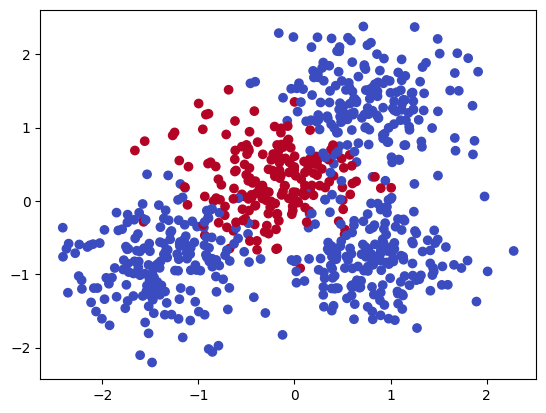

In [164]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1],[0,0]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.45, random_state=0)

labels_true = [1 if label == 3 else 0 for label in labels_true]

X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_true, cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
labels_true[0:10]

Observe that the nonlinear SVM can achieve a higher test accuracy compared to linear SVM.

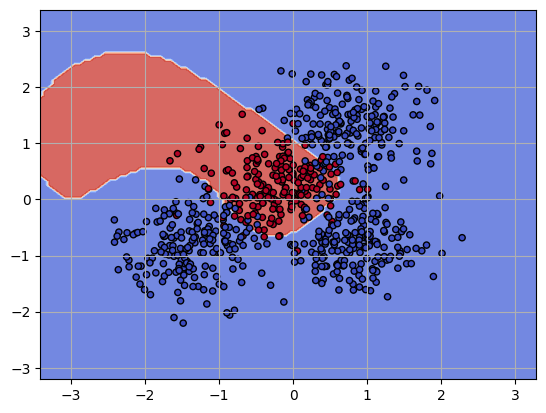

In [172]:
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 40  # SVM regularization parameter
model_svc = SVC(kernel="rbf", C=C)
#model = SVC(kernel="rbf", gamma=0.7, C=C)
model_svc.fit(X, labels_true)

# title for the plots
titles = "SVC with linear kernel",

fig, ax = plt.subplots()
disp = DecisionBoundaryDisplay.from_estimator(
        model_svc,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
    )
X0, X1 = X[:, 0], X[:, 1]
ax.scatter(X0, X1, c=labels_true, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.grid()

In [173]:
from sklearn.metrics import accuracy_score

y_pred =  model_svc.predict(X)

accuracy_score(y_pred, labels_true)

0.928

In [ ]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, labels_true, test_size=0.5, random_state=0)


SVMtrainAcc = []
SVMtestAcc = []

for param in C:

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))


plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

# Model Overfitting 

To illustrate the problem of model overfitting, we consider a two-dimensional dataset containing 1500 labeled instances, each of which is assigned to one of two classes, 0 or 1. Instances from each class are generated as follows:
1. Instances from class 1 are generated from a mixture of 3 Gaussian distributions, centered at [6,14], [10,6], and [14 14], respectively. 
2. Instances from class 0 are generated from a uniform distribution in a square region, whose sides have a length equals to 20.

For simplicity, both classes have equal number of labeled instances. The code for generating and plotting the data is shown below. All instances from class 1 are shown in red while those from class 0 are shown in black.

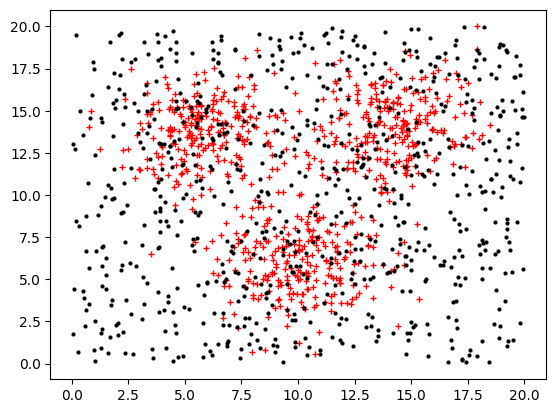

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

%matplotlib inline

N = 1500

mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]]  # diagonal covariance

np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))

plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets. 

In [ ]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

The plot above shows that training accuracy will continue to improve as the maximum depth of the tree increases (i.e., as the model becomes more complex). However, the test accuracy initially improves up to a maximum depth of 5, before it gradually decreases due to model overfitting.

# Cross Validation

In [6]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4] , [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 1, 2 , 2, 3])
kf = KFold(n_splits=3, shuffle=True)
kf.get_n_splits(X)
print(kf)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"Train: index={train_index}")
    print(f"Test:  index={test_index}")

KFold(n_splits=3, random_state=None, shuffle=True)
Fold 0:
Train: index=[0 2 3 5 6]
Test:  index=[1 4 7]
Fold 1:
Train: index=[1 4 5 6 7]
Test:  index=[0 2 3]
Fold 2:
Train: index=[0 1 2 3 4 7]
Test:  index=[5 6]


# Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 1, 1, 0, 1, 0]
y_pred = [0, 0, 1, 1, 0, 0, 1]
confusion_matrix(y_true, y_pred)

array([[3, 1],
       [1, 2]])

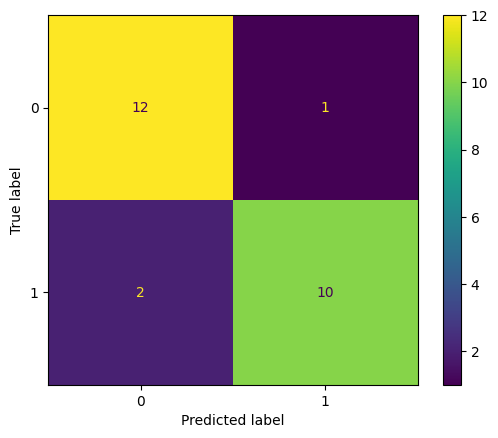

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

SVM: accuracy depending on C

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.   1.  ]]


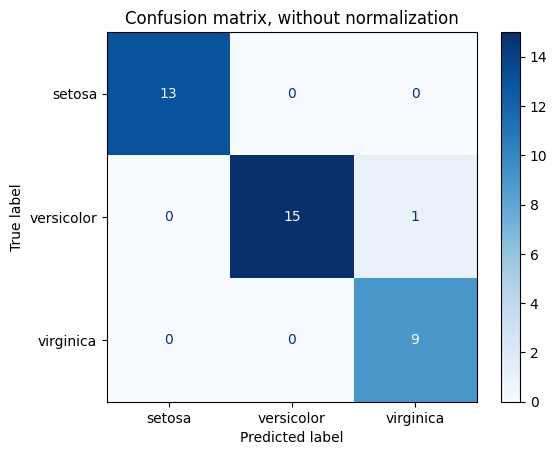

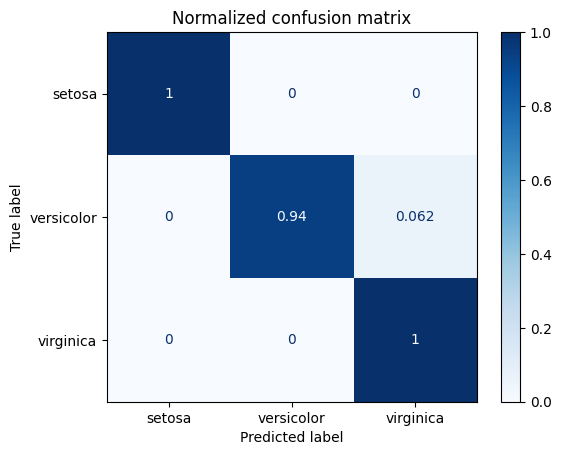

In [10]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.1).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Ensemble Methods

In [174]:
import pandas as pd
df = pd.read_csv("./Data/flight/train.csv")
#print(df.head())
#print(df.columns)

gender_set = set(df['Gender'])
gender_Dic = {k:v for v, k in enumerate(gender_set)}
df['Gender'].replace(gender_Dic, inplace=True)
customer_type_set = set(df['Customer Type'])
customer_type_Dic = {k:v for v, k in enumerate(customer_type_set)}
df['Customer Type'].replace(customer_type_Dic, inplace=True)
type_of_Travel_set = set(df['Type of Travel'])
type_of_Travel_Dic = {k:v for v, k in enumerate(type_of_Travel_set)}
df['Type of Travel'].replace(type_of_Travel_Dic, inplace=True)
class_set = set(df['Class'])
class_Dic = {k:v for v, k in enumerate(class_set)}
df['Class'].replace(class_Dic, inplace=True)

print(df.shape)
df.dropna(inplace=True)
print(df.shape)
df = df.sample(frac=0.05, random_state=1)
print(df.shape)

y = df['satisfaction']
X = df.drop(['Unnamed: 0','id', 'satisfaction'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2,  random_state=0)


(103904, 25)
(103594, 25)
(5180, 25)


In [176]:
print(X_train.shape)
print(X_test.shape)

(4144, 22)
(1036, 22)


In [179]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = DecisionTreeClassifier(max_depth=maxdepth)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))


clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train, Y_train)
Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
trainAcc.append(accuracy_score(Y_train, Y_predTrain))
testAcc.append(accuracy_score(Y_test, Y_predTest))

[(0.8, 1.0)]

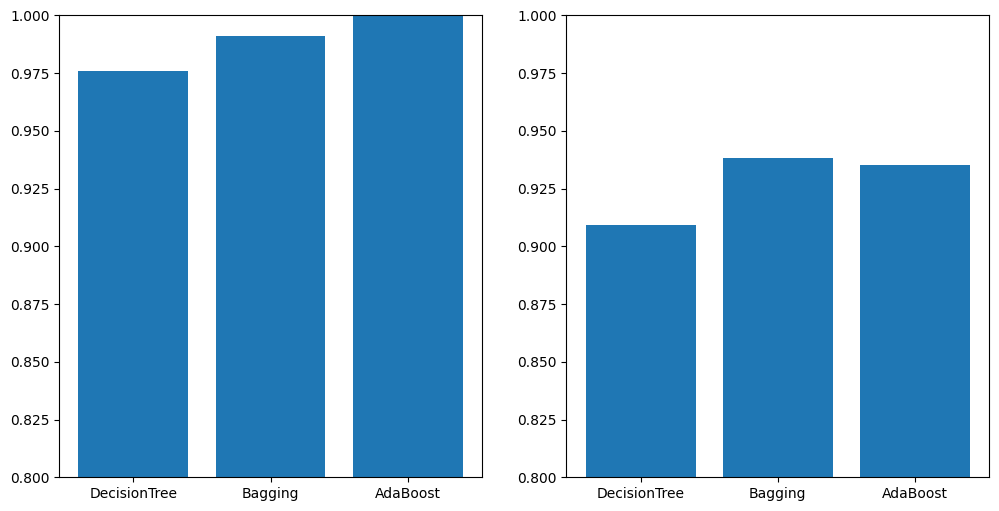

In [180]:
methods = ['DecisionTree', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax1.set(ylim=[0.8, 1])
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)
ax2.set(ylim=[0.8, 1])